# Meta-Heuríticas : Trabalho Prático 1 

- Aymê Faustino dos Santos - 4704
- Pedro Augusto Martins Pereira - 4692
- Henrique Alves Campos - 4231

O trabalho consiste em implementar duas meta-heuríticas para minimizar duas funções objetivo, cada uma em dois intervalos diferentes, sendo o segundo, um intervado mais restrito contido no primeiro intervalo.

## Bibliotecas Necessarias

In [33]:
import math
import random
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

## 1. Funções Objetivo 

### 1.1 Representação da Solução

Vamos utilizar um vetor para representar as variáveis de decisão. Na função objetivo 1 ele terá tamanho dois pois temos duas variaveis de decisão poŕem na função objetivo 2 temos quatro variaveis de decisão sendo assim ele terá tamanho quatro.

### 1.2 Função Objetivo 1



1.2.1 Intervalos 

a) - 100 <= x1 e x2 <= 100

b) -20 <= x1 e x2 <= 20

In [34]:
def funcao_objetivo_01(solucao):
    sum_sq = np.sum(np.square(solucao))
    raiz = np.sqrt(sum_sq)
    return 1 - np.cos(2 * np.pi * raiz) + 0.1 * raiz

intervalo1_a = [-100,100]
intervalo1_b = [-20,20]

1.2.2 Superficie

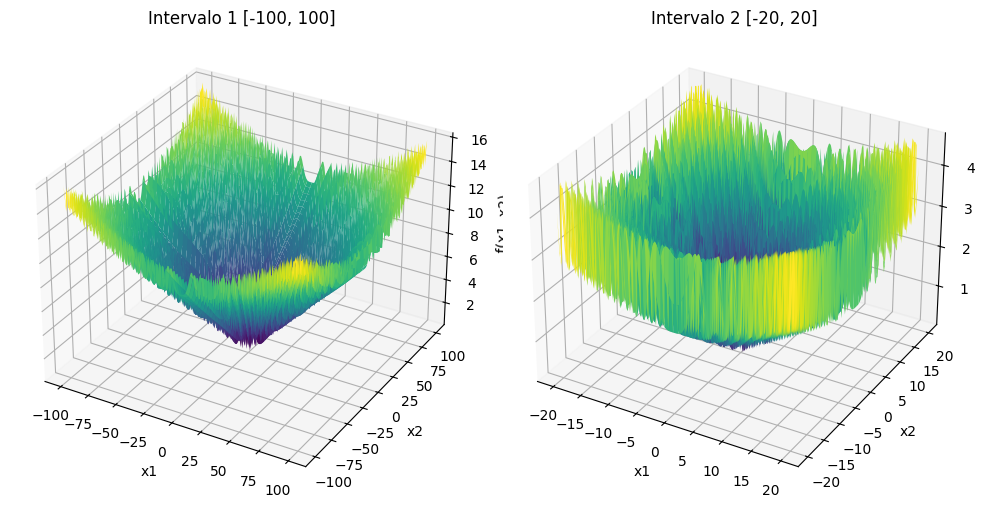

In [35]:
def plotar_superficies(intervalos, titulos):
    fig = plt.figure(figsize=(10, 5))  

    for i, (intervalo, titulo) in enumerate(zip(intervalos, titulos), start=1):
        x = np.linspace(intervalo[0], intervalo[1], 200)
        y = np.linspace(intervalo[0], intervalo[1], 200)
        X, Y = np.meshgrid(x, y)

        Z = np.array([[funcao_objetivo_01([x_, y_]) for x_, y_ in zip(x_row, y_row)] 
                      for x_row, y_row in zip(X, Y)])

        ax = fig.add_subplot(1, 2, i, projection='3d')  # 1 linha, 2 colunas
        surf = ax.plot_surface(X, Y, Z, cmap='viridis', edgecolor='none')
        ax.set_title(titulo)
        ax.set_xlabel('x1')
        ax.set_ylabel('x2')
        ax.set_zlabel('f(x1, x2)')

    plt.tight_layout()
    plt.show()

intervalos = [(-100, 100), (-20, 20)]
titulos = ['Intervalo 1 [-100, 100]', 'Intervalo 2 [-20, 20]']
plotar_superficies(intervalos, titulos)

### 1.3 Função Objetivo 2

1.3.1 Intervalos

a)−10 ≤ 𝑥1, 𝑥2, 𝑥3, 𝑥4 ≤ 10

b)−2 ≤ 𝑥1, 𝑥2, 𝑥3, 𝑥4 ≤ 2

In [36]:
def funcao_objetivo_02(x):
    return (100 * (x[0]**2 - x[1])**2 +
            (x[0] - 1)**2 +
            (x[2] - 1)**2 +
            90 * (x[2]**2 - x[3])**2 +
            10.1 * ((x[1] - 1)**2 + (x[3] - 1)**2) +
            19.8 * (x[1] - 1) * (x[3] - 1))

intervalo2_a = [-10,10]
intervalo2_b = [-2,2]

1.3.2 Superficie

Como a função f(x) depende de quatro variáveis, foi necessário fixar x₃ e x₄ para permitir a visualização em 3D. Assim, foi possível analisar o comportamento da função variando apenas x₁ e x₂.

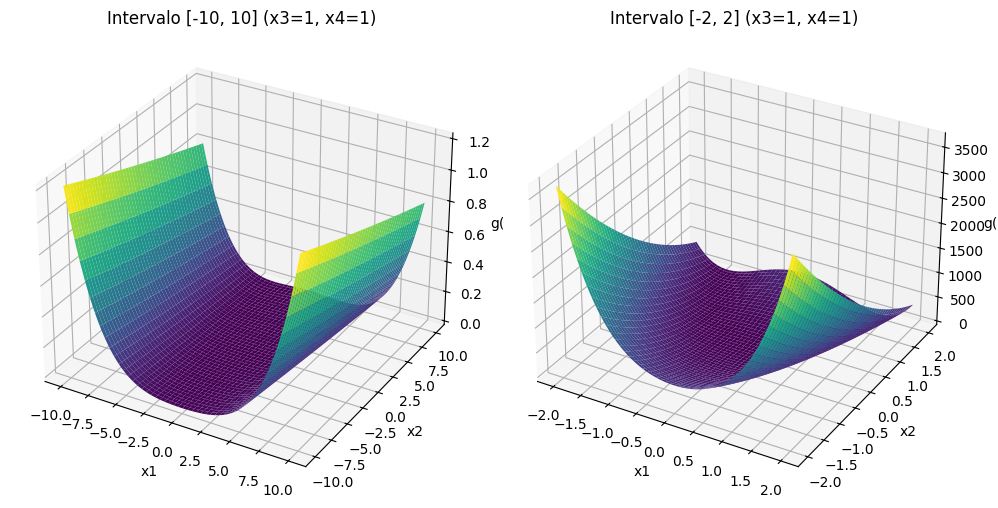

In [37]:
def plotar_superficies_2(intervalos, titulos, x3=1, x4=1):
    fig = plt.figure(figsize=(10, 5))

    for i, (intervalo, titulo) in enumerate(zip(intervalos, titulos), start=1):
        x = np.linspace(intervalo[0], intervalo[1], 200)
        y = np.linspace(intervalo[0], intervalo[1], 200)
        X, Y = np.meshgrid(x, y)

        Z = np.array([[funcao_objetivo_02([x_, y_, x3, x4]) for x_, y_ in zip(x_row, y_row)]
                      for x_row, y_row in zip(X, Y)])

        ax = fig.add_subplot(1, 2, i, projection='3d')
        surf = ax.plot_surface(X, Y, Z, cmap='viridis', edgecolor='none')
        ax.set_title(f"{titulo} (x3={x3}, x4={x4})")
        ax.set_xlabel('x1')
        ax.set_ylabel('x2')
        ax.set_zlabel('g(x)')

    plt.tight_layout()
    plt.show()

intervalo2_a = (-10, 10)
intervalo2_b = (-2, 2)
titulos = ["Intervalo [-10, 10]", "Intervalo [-2, 2]"]

plotar_superficies_2([intervalo2_a, intervalo2_b], titulos)

## 2. Meta-Heuristicas

Para minimiziar as funções objetivos vamos utilizar um algoritmo baseado em VNS (Variable Neighborhood Search) e um algoritmo baseado em #Escolher. Antes de implementar cada um deles vamos entender a ideia de cada uma dessas meta-heuristicas e quais decisões precisam ser tomadas em cada uma delas.

### 2.1 VNS (Variable Neighborhood Search) 

O Variable Neighborhood Search (VNS) é uma metaheurística baseada na exploração sistemática de diferentes vizinhanças para encontrar a solução ótima de um problema. A principal motivação do VNS é evitar ficar preso em ótimos locais, expandindo a busca para outras regiões do espaço de soluções.

Ele se baseia na seguinte ideia:
- Se uma solução é um ótimo local em uma vizinhança, ela pode não ser em outra.
- Alternar entre diferentes vizinhanças ajuda a escapar de ótimos locais e encontrar melhores soluções.

VNS é eficiente, simples e versátil, sendo utilizado em problemas de otimização combinatória e contínua.

#### 2.1.1 Pseudocódigo do VNS Básico

Entrada: solução inicial `x`, número máximo de vizinhanças `k_max`, número máximo de iterações

1. x_best ← x

2. Para t = 1 até max_iter faça:

    3. k ← 1

    4. Enquanto k ≤ k_max faça:

        5.   Gerar x' na k-ésima vizinhança de x_best

        6.   Aplicar busca local a partir de x', obtendo x''

        7.   Se f(x'') < f(x_best):

        8.       x_best ← x''

        9.       k ← 1   // reinicia vizinhança

        10.  Senão:

        11.      k ← k + 1
        
12. Retornar x_best



Decisões importantes na implementação do VNS

- Solução Inicial
- Estrutura de Vizinhança
- Condições de Parada
- Estratégia de Busca Local
- Quantidade de vizinhanças (k_max)

### 2.1.2 Solução Inicial

Como a solução será representada por meio de um vetor, uma estratégia simples e muito utilizada na inicialização é a de gerar uma solução aleatória preenchendo as posições do vetor com valores que estejam dentro de um intervalo pré definido para cada variável.

### 2.1.3 Metodo de busca local

#### Hill Climbing


O Hill Climbing é um método de busca local que usa um procedimento de melhora iterativa, ou seja, a cada iteração ele tenta melhorar a solução corrente sendo portanto um algoritmo gulosa que não aceita piora. Seu algorimo para problemas de minimização é:

```
s --> solução candidata inicial
repita 
    r = perturba(copia(s)) --> faz uma perturbação pequena na solução corrente para encontrar um nova solução
    se qualidade(r)<qualidade(s) então --> compara o valor da função objetivo na nova solução com o da solução corrente
        s = r --> se melhoran atualiza solucao corrente
    --> se não melhora não faz nada
até condição de parada
retorne s
```

Analisando o algoritmo é preciso definir:
* Como obter solução Inicial
* Como pertubarr uma solução
* Condição de Parada

#### Solução Inicial

Como o Hill Climbing vai ser utilizado como uma etapa do VNS a solução canditada vai ser definida no VNS.

#### Perturbar Solução

O algoritmo Hill Climbing realiza pequenas perturbações na solução corrente, adicionando um valor aleatório, chamado de ruído, em cada variável de decisão. O desafio é controlar o tamanho da perturbação para que ela seja pequena o suficiente para não causar grandes variações, mas suficiente para explorar o espaço de soluções. Uma estratégia possível é limitar o ruído a um valor proporcional à solução atual, utilizando uma porcentagem dentro de um intervalo especificado.

Será utilizado um algoritmo que recebe o intervalo da porcentagem do ruído como parâmetro e escolhe aleatoriamente um valor dentro desse intervalo para cada variável de decisão. Isso permite que o método seja flexível e possa ser utilizado para perturbações de diferentes magnitudes, dependendo da configuração. O pseudocódigo do algoritmo é o seguinte:

```
min = valor mínimo desejado para cada elemento do vetor
max = valor máximo desejado para cada elemento do vetor

min_ruido = porcentagem mínima do ruído
max_ruido = porcentagem máxima do ruído

v = quantidade de variáveis de decisão
vetor[v] = solução a ser perturbada

for i de 1 até v faça --> para cada elemento do vetor de variáveis
    ruido = número aleatório [min_ruido, max_ruido]
    perturbacao = vetor[i] + ruido * (número aleatório [min[i], max[i]] - vetor[i])

    se perturbacao < min[i] ou perturbacao > max[i] então
        enquanto perturbacao < min[i] ou perturbacao > max[i] faça
            ruido = número aleatório [min_ruido, max_ruido]
            perturbacao = vetor[i] + ruido * (número aleatório [min[i], max[i]] - vetor[i])
    
    adicionar perturbacao ao vetor

retornar vetor como array numpy

```

Para as pequenas pertubações vamos utilizar um ruido de 3% a 5%

#### Condição de parada

Existem várias estratégias que podem ser adotadas como condição de parada, como:
* certa quantidade de iterações realizadas
* certa quantidade de avaliações da função objetivo realizadas
* limite de tempo gasto
* certo número de iterações sme melhoria da solução atual

Na implementação do Hill Climbing o critério de parada será realizar 5 iterações sem melhoria da solução atual 

### 2.1.4 Gerar solução inicial aleatoria

In [38]:
def solucaoInicialAleatoria(min, max, qtdVariaveisDecisao):
    v = []
    for i in range(qtdVariaveisDecisao):
        v.append(random.uniform(min[i], max[i]))
    return np.array(v)

### 2.1.5 Gerar pertubações 

In [39]:
def pertubacao(solucao, min, max, min_ruido, max_ruido, qtdVariaveisDecisao):
    nova_solucao = []
    for i in range(qtdVariaveisDecisao):
        ruido = random.uniform(min_ruido, max_ruido)
        perturbacao = solucao[i] + ruido * (random.uniform(min[i], max[i]) - solucao[i])
        
        # Checagem das restrições
        if perturbacao < min[i] or perturbacao > max[i]:
            # Caso a perturbação saia dos limites, tentamos gerar outra perturbação
            # ou ajustamos para dentro dos limites
            while perturbacao < min[i] or perturbacao > max[i]:
                ruido = random.uniform(min_ruido, max_ruido)
                perturbacao = solucao[i] + ruido * (random.uniform(min[i], max[i]) - solucao[i])
        
        # Adiciona a perturbação à nova solução
        nova_solucao.append(perturbacao)
    
    return np.array(nova_solucao)


### 2.1.6 Hill Climbing 

In [40]:
def hillClimbing(solucao, funcaoObjetivo, min, max, qtdVariaveisDecisao, max_iter=100):
    min_ruido = 0.05  # pode até aumentar esse ruído
    max_ruido = 0.1
    semMudanca = 0
    iter_count = 0

    while semMudanca < 5 and iter_count < max_iter:
        novaSolucao = pertubacao(solucao.copy(), min, max, min_ruido, max_ruido, qtdVariaveisDecisao)
        
        if funcaoObjetivo(novaSolucao) < funcaoObjetivo(solucao):
            solucao = novaSolucao
            semMudanca = 0
        else:
            semMudanca += 1
        
        iter_count += 1

    return solucao


### 2.1.7 VNS

In [41]:
def vns(funcaoObjetivo, min, max, qtdVariaveisDecisao, k_max=5, max_iter=100):
    solucao_inicial = solucaoInicialAleatoria(min, max, qtdVariaveisDecisao)

    solucao_corrente = solucao_inicial
    melhor_solucao = solucao_inicial
    melhor_valor = funcaoObjetivo(melhor_solucao)

    iter_total = 0

    while iter_total < max_iter:
        k = 1
        while k <= k_max:
            # Perturbação: nova solução na vizinhança k
            nova_solucao = solucao_corrente + np.random.uniform(-1, 1, size=solucao_corrente.shape)
            nova_solucao = np.clip(nova_solucao, min, max)
            
            # Busca local (hill climbing)
            nova_solucao = hillClimbing(nova_solucao, funcaoObjetivo, min, max, qtdVariaveisDecisao)
            valor_nova_solucao = funcaoObjetivo(nova_solucao)

            if valor_nova_solucao < melhor_valor:
                # Aceita e reinicia vizinhança
                melhor_solucao = nova_solucao
                melhor_valor = valor_nova_solucao
                solucao_corrente = nova_solucao
                k = 1
            else:
                # Não melhorou: avança para próxima vizinhança
                k += 1

        iter_total += 1

    return melhor_solucao



#### Função Auxiliar Para Plotar um Gráfico com o Valor Final da Função Objetivo em cada Iteração

In [42]:
def objetivoFinalCadaIteracao(valores, target, titulo):
    plt.figure(figsize=(15, 8))
    min_index = np.argmin(valores[target])  # Índice do melhor valor (mínimo)

    # Plotar a curva dos valores da função objetivo
    plt.plot(range(1, len(valores[target]) + 1), valores[target], linestyle='-', label=target, color='lightgreen')

    for i in range(len(valores[target])):
        # Ponto atual
        y = valores[target][i]

        # Coleta os valores das variáveis (x1, x2, x3, ..., xn)
        texto_variaveis = '\n'.join([f'{var} = {valores[var][i]:.4f}' for var in valores if var != target])

        if i == min_index:
            # Destaca o melhor valor
            plt.scatter(i + 1, y, color='lightgreen', marker='o')
            plt.text(i + 1, y, f'{y:.6f}', fontsize=12, fontweight='bold', ha='center', va='bottom', color='purple')
            plt.text(i + 1, y, texto_variaveis, fontsize=10, fontweight='bold', ha='center', va='top', color='black')
        else:
            # Pontos normais
            plt.scatter(i + 1, y, color='lightgreen', marker='o')
            plt.text(i + 1, y, f'{y:.6f}', fontsize=8, ha='center', va='center', color='black')

    # Configurações visuais
    plt.xticks([i for i in range(1, len(valores[target]) + 1)])
    plt.xlabel('Execuções')
    plt.ylabel('Valor da função objetivo')
    plt.title(f'Valor Final da Função Objetivo em cada Execução do {titulo}')
    plt.legend()
    plt.grid(True)
    plt.show()


#### Intervalo 1A

In [43]:
vns_1a = {'x1': [], 'x2': [], 'f(x1,x2)': []}

min_intervalo = intervalo1_a[0]
max_intervalo = intervalo1_a[1]

# Rodando o algoritmo VNS 30 vezes com diferentes quantidades de variáveis de decisão
for i in range(30):
    # Aqui você pode definir dinamicamente a quantidade de variáveis de decisão
    qtdVariaveisDecisao = 2
    
    solucao = vns(funcao_objetivo_01, [min_intervalo] * qtdVariaveisDecisao, [max_intervalo] * qtdVariaveisDecisao, qtdVariaveisDecisao)
    
    vns_1a['x1'].append(solucao[0])  
    vns_1a['x2'].append(solucao[1]) 
    vns_1a['f(x1,x2)'].append(funcao_objetivo_01(solucao))  
    

print(vns_1a)


{'x1': [np.float64(-0.025554221752039696), np.float64(0.007993165943876113), np.float64(-0.018886992961062), np.float64(-0.04667365224297493), np.float64(-0.44935924807203986), np.float64(-0.004963858082409844), np.float64(0.03729956742156171), np.float64(-0.05692119819597291), np.float64(0.7701065565920336), np.float64(-0.009345193552444453), np.float64(-0.05134069214296044), np.float64(0.05543817297193643), np.float64(-0.8993019388215653), np.float64(-0.029768875210914647), np.float64(-0.0072115069948486266), np.float64(0.39967757159052464), np.float64(0.016864094580924194), np.float64(-0.04278064519619007), np.float64(0.006033140393451153), np.float64(0.02175150076737875), np.float64(0.9746383493738924), np.float64(-0.02022414306075304), np.float64(-0.7022398461928767), np.float64(-0.0403693751100922), np.float64(0.05966801998168769), np.float64(-0.039403768320053656), np.float64(0.04904449512640441), np.float64(0.02083626558785423), np.float64(0.016896877181512115), np.float64(0.00

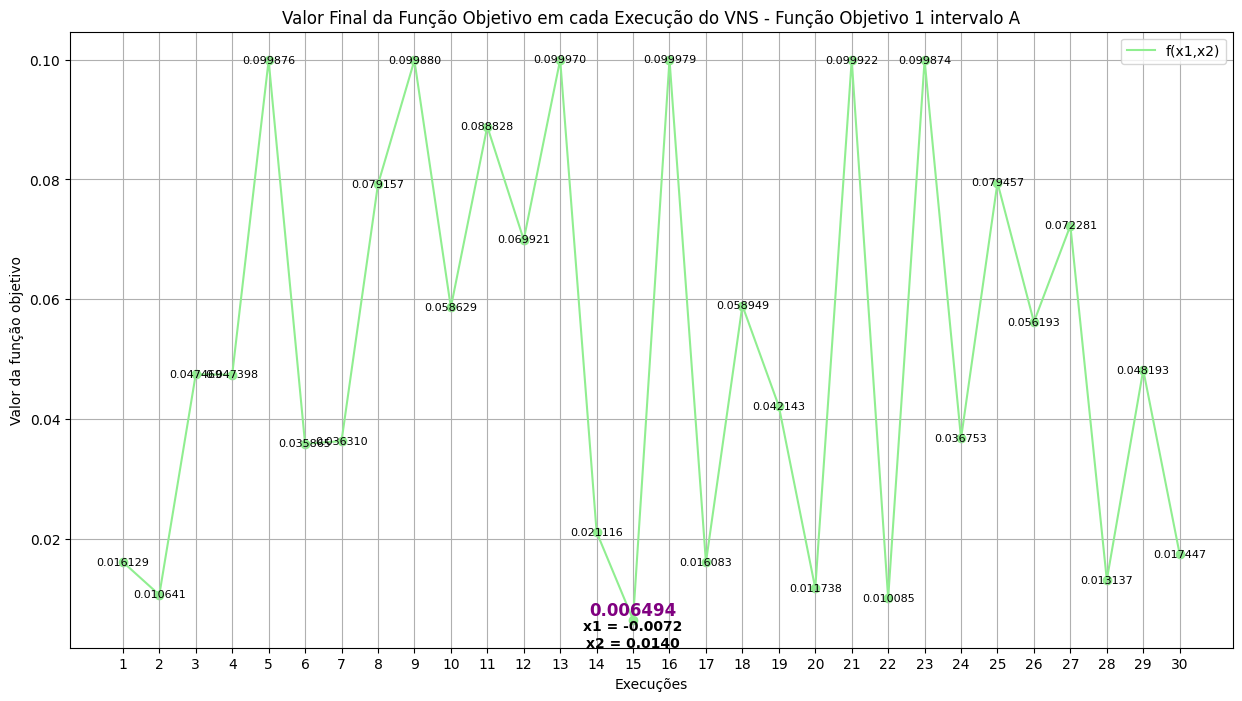

In [44]:
objetivoFinalCadaIteracao(vns_1a, 'f(x1,x2)', 'VNS - Função Objetivo 1 intervalo A')

#### Intervalo 1B

In [45]:
vns_1b = {'x1':[], 'x2':[], 'f(x1,x2)':[]} 

min = intervalo1_b[0] 
max = intervalo1_b[1]

qtdVariaveisDecisao = 2

for i in range(30):    
    # Chamada ao algoritmo VNS com a quantidade de variáveis de decisão
    solucao = vns(funcao_objetivo_01, [min] * qtdVariaveisDecisao, [max] * qtdVariaveisDecisao, qtdVariaveisDecisao)
    
    vns_1b['x1'].append(solucao[0]) 
    vns_1b['x2'].append(solucao[1])  
    vns_1b['f(x1,x2)'].append(funcao_objetivo_01(solucao))  # Calcula e armazena o valor da função objetivo
    

print(vns_1b)

{'x1': [np.float64(0.006484964342515109), np.float64(-0.01663992094075828), np.float64(0.01616133075490639), np.float64(0.0082810497868826), np.float64(0.017882871421624175), np.float64(-0.020770145261476802), np.float64(-0.012585759705348587), np.float64(-0.00615060018119562), np.float64(-0.015684955117013732), np.float64(-0.008898203415879546), np.float64(-0.0037181993098386323), np.float64(-0.026119812104890228), np.float64(-0.01659382018393818), np.float64(0.05192360454472933), np.float64(-0.034221566214406196), np.float64(-0.01677201694131414), np.float64(0.007269990216567379), np.float64(0.006202983394940131), np.float64(0.0027025677661447894), np.float64(-0.01240622254797985), np.float64(-0.005382093501509463), np.float64(0.026191574661652006), np.float64(0.0038555620574213245), np.float64(-0.010973962418630412), np.float64(0.006014446857596056), np.float64(0.0038276854902865587), np.float64(-0.032788887377750986), np.float64(0.02831677216265771), np.float64(0.04299455587928702)

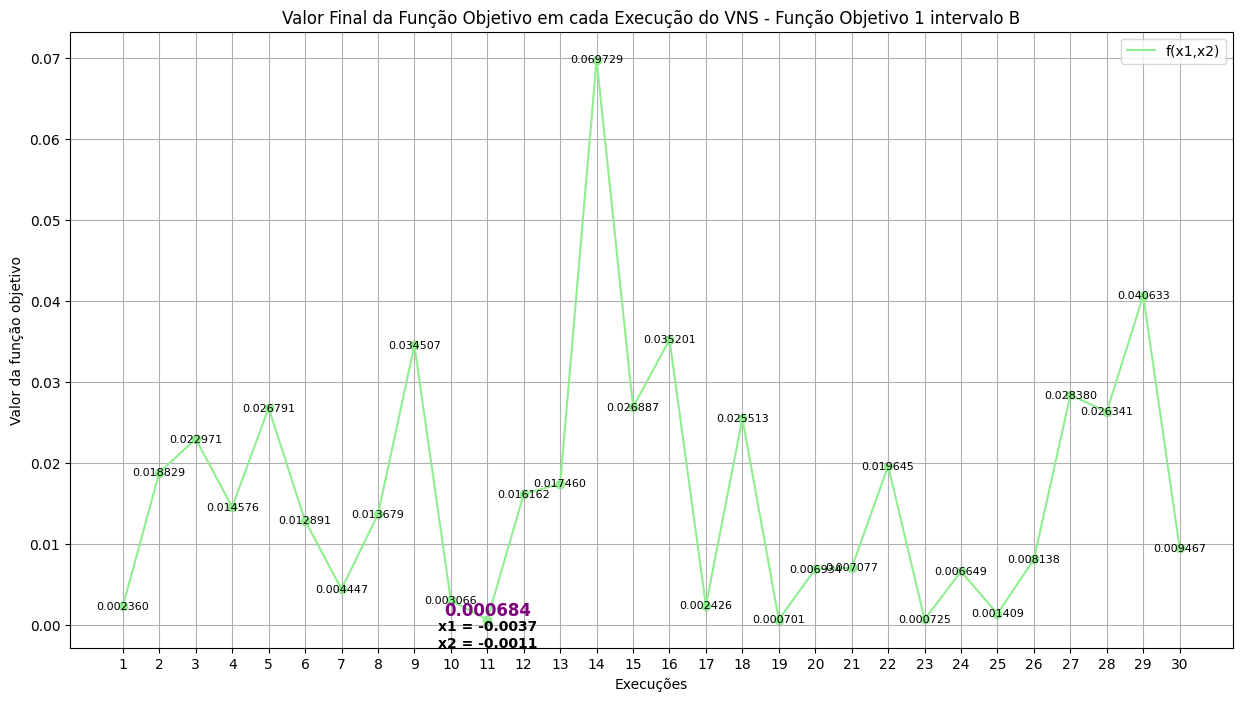

In [46]:
objetivoFinalCadaIteracao(vns_1b, 'f(x1,x2)', 'VNS - Função Objetivo 1 intervalo B')

#### Intervalo 2A

In [47]:
vns_2a = {'x1': [], 'x2': [], 'x3': [], 'x4': [], 'f(x1,x2,x3,x4)': []}

min_2a = intervalo2_a[0]  
max_2a = intervalo2_a[1]

qtdVariaveisDecisao=4

for i in range(30):
    # Chamada ao VNS com a quantidade de variáveis de decisão definida como 4
    solucao = vns(funcao_objetivo_02, [min_2a]* qtdVariaveisDecisao, [max_2a]* qtdVariaveisDecisao, qtdVariaveisDecisao)
    
    # Armazenando os resultados no dicionário
    vns_2a['x1'].append(solucao[0])
    vns_2a['x2'].append(solucao[1])
    vns_2a['x3'].append(solucao[2])
    vns_2a['x4'].append(solucao[3])
    vns_2a['f(x1,x2,x3,x4)'].append(funcao_objetivo_02(solucao))

print(vns_2a)


{'x1': [np.float64(1.2593932249205073), np.float64(0.38883459676117993), np.float64(0.5606068956642066), np.float64(0.9587248571847257), np.float64(1.347610007184197), np.float64(1.0514992145368225), np.float64(0.44686784641376215), np.float64(1.207090665591999), np.float64(0.7579174518216769), np.float64(1.0363486472300059), np.float64(0.7794416750288646), np.float64(1.2923377587942086), np.float64(1.2526811886684777), np.float64(0.9328616913317656), np.float64(0.7975933555760917), np.float64(1.1003810526430189), np.float64(1.3530526498737752), np.float64(0.9166343686075777), np.float64(0.9301239084540832), np.float64(0.5980673712954506), np.float64(0.7846748947566402), np.float64(0.9016996845175782), np.float64(1.2429807644634192), np.float64(0.9921850225976272), np.float64(1.3189130657429282), np.float64(0.8773534239841698), np.float64(0.5992886192268817), np.float64(0.8975304015091221), np.float64(0.9409953272368551), np.float64(1.241576988694934)], 'x2': [np.float64(1.573339817450

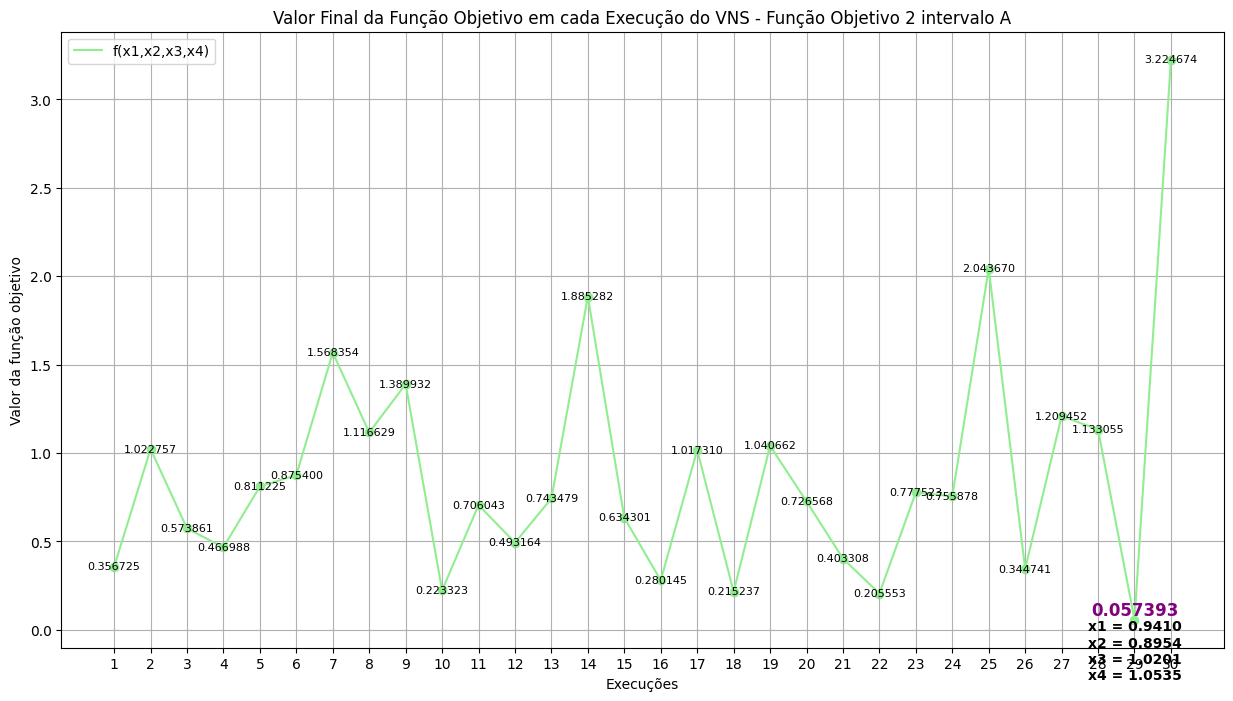

In [48]:
objetivoFinalCadaIteracao(vns_2a, 'f(x1,x2,x3,x4)', 'VNS - Função Objetivo 2 intervalo A')


#### Intervalo 2B


In [49]:
vns_2b = {'x1': [], 'x2': [], 'x3': [], 'x4': [], 'f(x1,x2,x3,x4)': []}

min_2b = intervalo2_b[0]  
max_2b = intervalo2_b[1] 

qtdVariaveisDecisao=4

for i in range(30):
    solucao = vns(funcao_objetivo_02, [min_2b]*qtdVariaveisDecisao, [max_2b]*qtdVariaveisDecisao, qtdVariaveisDecisao)
    
    vns_2b['x1'].append(solucao[0])
    vns_2b['x2'].append(solucao[1])
    vns_2b['x3'].append(solucao[2])
    vns_2b['x4'].append(solucao[3])
    vns_2b['f(x1,x2,x3,x4)'].append(funcao_objetivo_02(solucao))

print(vns_2b)


{'x1': [np.float64(0.9472813675377998), np.float64(0.6504488503681111), np.float64(0.9281591297405604), np.float64(0.8572075836365932), np.float64(1.056873886804952), np.float64(1.0428515075228553), np.float64(1.0018518700749557), np.float64(0.8401212277891389), np.float64(1.1573910087711443), np.float64(1.0816599664188802), np.float64(1.1622757800289412), np.float64(0.9170571156300265), np.float64(1.0029206146537812), np.float64(1.0627185375430983), np.float64(0.8566118708609194), np.float64(1.0589554185291312), np.float64(0.9800474812989306), np.float64(1.0665294754417234), np.float64(1.100438342034299), np.float64(1.1414052137734005), np.float64(1.0188924512655637), np.float64(0.9239354731307279), np.float64(1.2326810115682325), np.float64(0.9899660529201496), np.float64(1.02039197288807), np.float64(1.1357190934035588), np.float64(0.8251897001331348), np.float64(0.8085711853363369), np.float64(1.1041379771063784), np.float64(0.9416204695241871)], 'x2': [np.float64(0.893172599133930

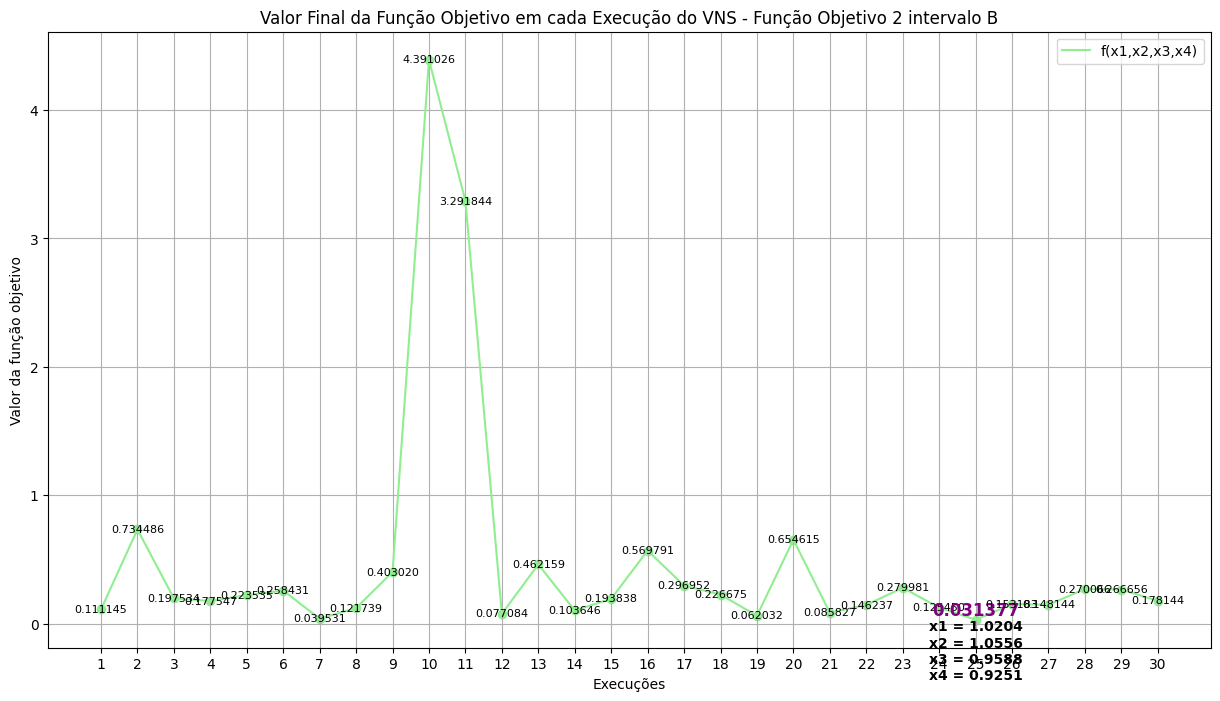

In [50]:
objetivoFinalCadaIteracao(vns_2b, 'f(x1,x2,x3,x4)', 'VNS - Função Objetivo 2 intervalo B')

### 2.2 Simulated Annealing (SA)

#### 2.2.1. Conceito do Algoritmo

O **Simulated Annealing** é inspirado no processo de recozimento em metalurgia:

1- **Temperatura alta** → Aceita soluções piores (exploração).

2- **Temperatura baixa** → Aceita apenas melhoras (exploitation).

3- **Resfriamento gradual** → Reduz a temperatura ao longo do tempo.

#### 2.2.2 Passos do algorítmo

```python
# 1. INICIALIZAÇÃO
x_atual ← SOLUÇÃO_ALEATÓRIA(limites, dimensao)  # Gera solução inicial
f_atual ← funcao_objetivo(x_atual)
T ← 1000                                        # Temperatura inicial
alpha ← 0.95                                    # Taxa de resfriamento
historico_melhores ← [f_atual]                  # Armazena histórico

# 2. LOOP TERMAL PRINCIPAL
ENQUANTO T > 0.01 FAÇA:
    PARA i DE 1 ATÉ 100 FAÇA:                   # Iterações por temperatura
        
        # 2.1 GERAÇÃO DE VIZINHO
        x_vizinho ← PERTURBA(x_atual, limites)
        f_vizinho ← funcao_objetivo(x_vizinho)
        delta ← f_vizinho - f_atual
        
        # 2.2 CRITÉRIO DE ACEITAÇÃO
        SE delta < 0 OU rand() < exp(-delta/T) ENTÃO:
            x_atual ← x_vizinho                 # Atualiza solução
            f_atual ← f_vizinho
            
            # 2.3 ATUALIZA MELHOR SOLUÇÃO
            SE f_atual < MIN(historico_melhores):
                melhor_x ← x_atual
                melhor_f ← f_atual
    
    # 2.4 RESFRIAMENTO
    T ← T * alpha                               # Reduz temperatura
    historico_melhores.APPEND(f_atual)          # Registra progresso

RETORNE melhor_x, melhor_f                      # Solução final

#### 2.2.3 Implementação em Python

##### 2.2.3.1 Classe do Simulated Annealing

In [54]:
import math

class SimulatedAnnealing:
    def __init__(self, dimensao, limites, funcao_objetivo):
        self.d = dimensao
        self.limite_inf = limites[0]
        self.limite_sup = limites[1]
        self.funcao_objetivo = funcao_objetivo
    
    def solucao_inicial(self):
        return np.random.uniform(self.limite_inf, self.limite_sup, self.d)
    
    def gerar_vizinho(self, x_atual, passo_max):
        perturbacao = np.random.uniform(-passo_max, passo_max, self.d)
        x_vizinho = x_atual + perturbacao
        return np.clip(x_vizinho, self.limite_inf, self.limite_sup)
    
    def executar(self, n_execucoes = 30, T_inicial = 1000, T_final = 0.01, alpha = 0.95, iteracoes_T = 150, passo_max = None):
        if passo_max is None:
            passo_max = (self.limite_sup - self.limite_inf) * 0.1 # Usa 10% como o padrão
        
        resultados = []
        melhores_x = []
        
        for _ in range(n_execucoes):
            x_atual = self.solucao_inicial()
            f_atual = self.funcao_objetivo(x_atual)
            T = T_inicial
            melhor_x = x_atual.copy()
            melhor_f = f_atual
            
            while T > T_final:
                for _ in range(iteracoes_T):
                    x_vizinho = self.gerar_vizinho(x_atual, passo_max)
                    f_vizinho = self.funcao_objetivo(x_vizinho)
                    
                    delta_f = f_vizinho - f_atual
                    
                    if delta_f < 0 or np.random.random() < math.exp(-delta_f / T):
                        x_atual, f_atual = x_vizinho, f_vizinho
                        
                        if f_atual < melhor_f:
                            melhor_f = f_atual
                            melhor_x = x_atual.copy()
                
                T *= alpha  # Resfriamento
            
            resultados.append(melhor_f)
            melhores_x.append(melhor_x)
        
        return {
            'resultados': np.array(resultados),
            'melhores_x': np.array(melhores_x),
            'media': np.mean(resultados),
            'minimo': np.min(resultados),
            'maximo': np.max(resultados),
            'desvio': np.std(resultados)
        }

#### 2.2.4 Execução para Todos os Problemas

#### Intervalo 1A

In [55]:
sa_1a = {'x1': [], 'x2': [], 'f(x1,x2)': []}

min_1a = intervalo1_b[0]
max_1a = intervalo1_b[1]

qtdVariaveisDecisao = 2

# Inicializa a classe SA
sa = SimulatedAnnealing(dimensao=qtdVariaveisDecisao, 
                        limites=[min_1a, max_1a], 
                        funcao_objetivo=funcao_objetivo_01)

resultado_sa = sa.executar(n_execucoes=30)

for x in resultado_sa['melhores_x']:
    sa_1a['x1'].append(x[0])
    sa_1a['x2'].append(x[1])
    sa_1a['f(x1,x2)'].append(funcao_objetivo_01(x))

print(sa_1a)

{'x1': [np.float64(0.054739304148468726), np.float64(0.3805328319403012), np.float64(-0.06142253547609311), np.float64(0.05334280246916556), np.float64(0.00018843529459111608), np.float64(0.03011077533376394), np.float64(0.023691079538934012), np.float64(0.012997542101434334), np.float64(-0.052745758932275955), np.float64(0.03387238747711052), np.float64(-0.018312634455617705), np.float64(0.06394331123413188), np.float64(-0.047910809166869406), np.float64(-0.023817779696348573), np.float64(-0.024150529112957564), np.float64(0.005392890953131335), np.float64(0.04280118028200519), np.float64(0.04059852205647996), np.float64(-0.027818512330566314), np.float64(0.04208504790452583), np.float64(0.040664948821116376), np.float64(0.023476380547265308), np.float64(0.007231148984614855), np.float64(0.039964432487867185), np.float64(-0.025213072233872147), np.float64(-0.018175174535651095), np.float64(0.057680690845564264), np.float64(-0.028010044555183633), np.float64(0.03904019650903745), np.fl

#### Intervalo 1B

In [56]:
sa_1b = {'x1': [], 'x2': [], 'f(x1,x2)': []}

min_1b = intervalo1_b[0]
max_1b = intervalo1_b[1]

qtdVariaveisDecisao = 2

sa = SimulatedAnnealing(dimensao=qtdVariaveisDecisao, 
                        limites=[min_1b, max_1b], 
                        funcao_objetivo=funcao_objetivo_01)

resultado_sa = sa.executar(n_execucoes=30)

for x in resultado_sa['melhores_x']:
    sa_1b['x1'].append(x[0])
    sa_1b['x2'].append(x[1])
    sa_1b['f(x1,x2)'].append(funcao_objetivo_01(x))

print(sa_1b)

{'x1': [np.float64(0.2472077131281516), np.float64(-0.003511298993766232), np.float64(0.024995116880268675), np.float64(-0.03997253633106457), np.float64(-0.047522869689172076), np.float64(-0.013314976824385205), np.float64(0.04196691738565672), np.float64(0.022942201446499055), np.float64(-0.028465126502506877), np.float64(0.01598832669997563), np.float64(0.01952197351416718), np.float64(0.0022795825908081824), np.float64(0.040626925859910124), np.float64(-0.007178463244516209), np.float64(0.04379656094723838), np.float64(-0.039274228271823475), np.float64(0.058300705970783184), np.float64(0.024890926297506333), np.float64(-0.013953225195081131), np.float64(-0.023671048360483837), np.float64(-0.017675852410937942), np.float64(0.9822148316646713), np.float64(0.015049451817401582), np.float64(0.012775528485046372), np.float64(0.0005839384420864846), np.float64(-0.017279260470354885), np.float64(0.0449113549023048), np.float64(-0.014905476537879103), np.float64(-0.004886993826777264), np

#### Intervalo 2A

In [57]:
sa_2a = {'x1': [], 'x2': [], 'x3': [], 'x4': [], 'f(x1,x2,x3,x4)': []}

min_2a = intervalo2_a[0]
max_2a = intervalo2_a[1]

qtdVariaveisDecisao = 4

sa2 = SimulatedAnnealing(dimensao=qtdVariaveisDecisao, 
                                limites=[min_2a, max_2a], 
                                funcao_objetivo=funcao_objetivo_02)

resultado_sa_2a = sa2.executar(n_execucoes=30)

for x in resultado_sa_2a['melhores_x']:
    sa_2a['x1'].append(x[0])
    sa_2a['x2'].append(x[1])
    sa_2a['x3'].append(x[2])
    sa_2a['x4'].append(x[3])
    sa_2a['f(x1,x2,x3,x4)'].append(funcao_objetivo_02(x))

print("SA - Resultado 2a")
print(sa_2a)


SA - Resultado 2a
{'x1': [np.float64(0.7368193817621211), np.float64(1.4394170891596003), np.float64(1.4733159651192116), np.float64(0.7774233315928605), np.float64(1.3224439709428588), np.float64(-0.2191924918473327), np.float64(0.9722253185919096), np.float64(0.8083140431021607), np.float64(0.9239830587497329), np.float64(1.1491333385010147), np.float64(0.5882090431972005), np.float64(0.7670630327158539), np.float64(1.0736404677713933), np.float64(1.3345899567583888), np.float64(0.7278504527011442), np.float64(1.2999700261248779), np.float64(0.9920074972741029), np.float64(0.9934870289787767), np.float64(1.033847073232979), np.float64(1.3304423053143264), np.float64(1.1229077783085408), np.float64(0.8342399304341974), np.float64(0.9946104702901284), np.float64(0.7074141932929274), np.float64(0.7935201901248146), np.float64(0.9843594678756924), np.float64(0.9792807394529133), np.float64(0.936270151314758), np.float64(0.9644091524906093), np.float64(1.1939283664225973)], 'x2': [np.floa

#### Intervalo 2B

In [58]:
sa_2b = {'x1': [], 'x2': [], 'x3': [], 'x4': [], 'f(x1,x2,x3,x4)': []}

min_2b = intervalo2_b[0]
max_2b = intervalo2_b[1]

qtdVariaveisDecisao = 4

sa_exec_2b = SimulatedAnnealing(dimensao=qtdVariaveisDecisao, 
                                limites=[min_2b, max_2b], 
                                funcao_objetivo=funcao_objetivo_02)

resultado_sa_2b = sa_exec_2b.executar(n_execucoes=30)

for x in resultado_sa_2b['melhores_x']:
    sa_2b['x1'].append(x[0])
    sa_2b['x2'].append(x[1])
    sa_2b['x3'].append(x[2])
    sa_2b['x4'].append(x[3])
    sa_2b['f(x1,x2,x3,x4)'].append(funcao_objetivo_02(x))

print("SA - Resultado 2b")
print(sa_2b)

SA - Resultado 2b
{'x1': [np.float64(1.10131804595399), np.float64(1.0470158832666863), np.float64(0.900968730957409), np.float64(0.9400206399423314), np.float64(0.9197734970835256), np.float64(0.8108133978053358), np.float64(1.1167525737500528), np.float64(1.0650684257287844), np.float64(1.12654097376056), np.float64(1.0638928360522766), np.float64(1.0773445463314708), np.float64(1.0557639368887208), np.float64(0.9968499680208289), np.float64(1.086340856345246), np.float64(0.9628993491239204), np.float64(1.18122670838794), np.float64(0.8735588563199892), np.float64(0.9827348730046719), np.float64(0.8984147466376075), np.float64(1.149348027861744), np.float64(1.0933830355515313), np.float64(1.0267665107195723), np.float64(1.0090061732909947), np.float64(1.1085200103527226), np.float64(1.0151687323240277), np.float64(1.1114950821955123), np.float64(0.9342576683656585), np.float64(1.1053314542734975), np.float64(0.8912206477907271), np.float64(0.913493569094243)], 'x2': [np.float64(1.216

#### Função para exibir o boxplot

In [59]:
def exibirBoxplot(resultados_vns, resultados_sa, titulo):
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

    sns.boxplot(y=resultados_vns, ax=ax1, color='green')
    sns.boxplot(y=resultados_sa, ax=ax2, color='blue')

    ax1.set_title('VNS', fontsize=10, fontweight='bold')
    ax1.set_ylabel('Valor da Função Objetivo', fontsize=10)
    ax2.set_title('SA', fontsize=10, fontweight='bold')

    fig.suptitle(titulo, fontsize=12, fontweight='bold')

    plt.tight_layout()
    plt.show() 

#### Função para gerar as estatisticas

In [60]:
def estatisticas(resultadosComparar, nome_funcao_objetivo, nomes_algoritmos):
    estatisticas = {'algoritmo': [], 'minimo': [], 'maximo': [], 'media': [], 'dp': [], 'x_do_minimo': [], 'y_do_minimo': []}

    for i, resultado in enumerate(resultadosComparar):
        objetivo = resultado[nome_funcao_objetivo]
        estatisticas['algoritmo'].append(nomes_algoritmos[i])
        estatisticas['minimo'].append(np.min(objetivo))
        estatisticas['maximo'].append(np.max(objetivo))
        estatisticas['media'].append(np.mean(objetivo))
        estatisticas['dp'].append(np.std(objetivo))
        indice_minimo = np.argmin(objetivo)
        estatisticas['x_do_minimo'].append(resultado['x1'][indice_minimo])
        estatisticas['y_do_minimo'].append(resultado['x2'][indice_minimo])  # ou x4 se quiser ajustar
    return pd.DataFrame(estatisticas)

Estatísticas Função 1 - Intervalo 1a
  algoritmo    minimo    maximo     media        dp  x_do_minimo  y_do_minimo
0       VNS  0.006494  0.099979  0.052664  0.032527    -0.007212     0.014043
1        SA  0.004299  0.099874  0.044417  0.029230     0.005393    -0.011214 

Estatísticas Função 1 - Intervalo 1b
  algoritmo    minimo    maximo     media        dp  x_do_minimo  y_do_minimo
0       VNS  0.000684  0.069729  0.016809  0.015055    -0.003718    -0.001094
1        SA  0.003660  0.099877  0.039230  0.025708    -0.007178     0.008753 



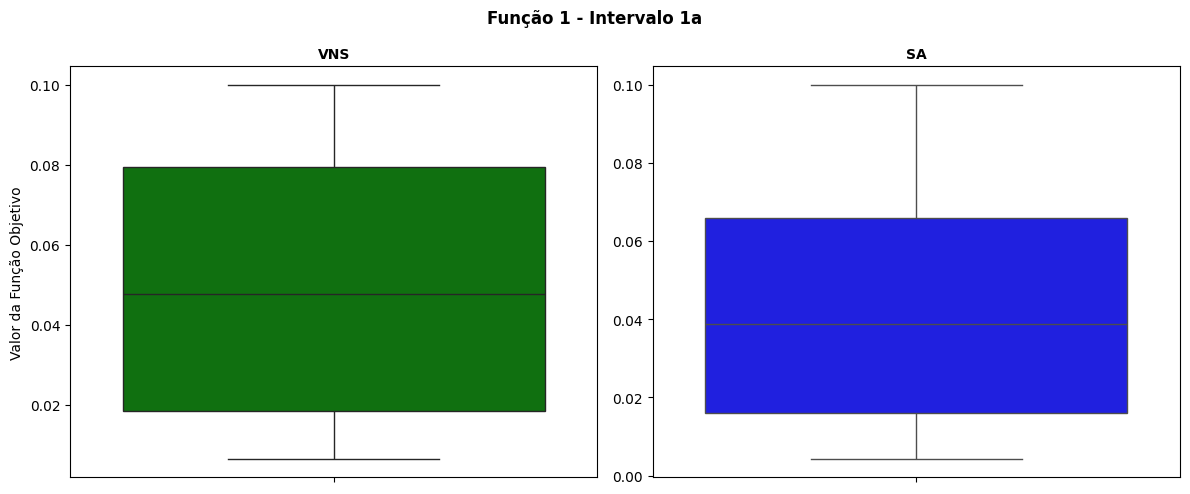

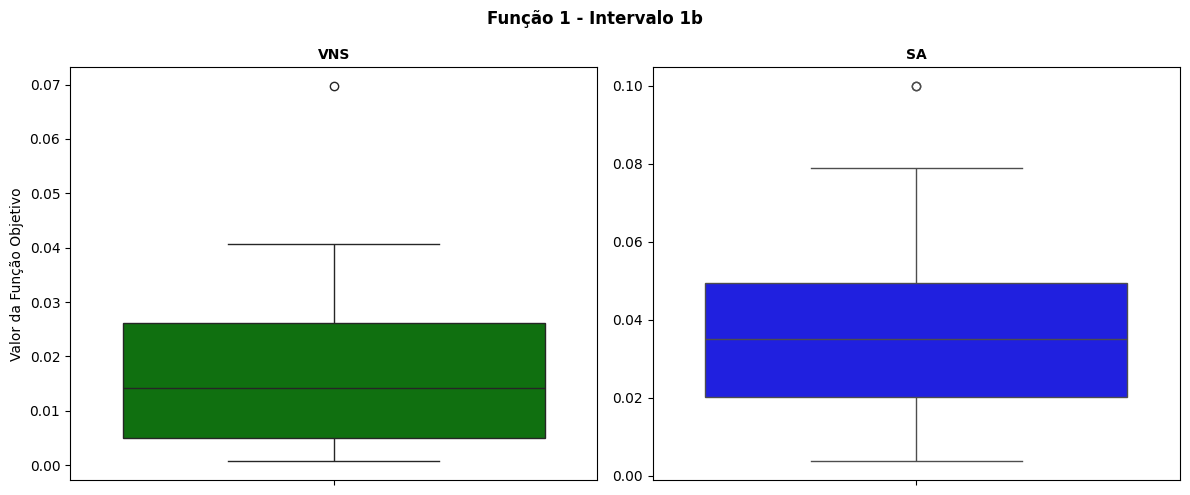

In [61]:
print("Estatísticas Função 1 - Intervalo 1a")
estat_1a = estatisticas([vns_1a, sa_1a], 'f(x1,x2)', ['VNS', 'SA'])
print(estat_1a, "\n")

print("Estatísticas Função 1 - Intervalo 1b")
estat_1b = estatisticas([vns_1b, sa_1b], 'f(x1,x2)', ['VNS', 'SA'])
print(estat_1b, "\n")

exibirBoxplot(vns_1a['f(x1,x2)'], sa_1a['f(x1,x2)'], 'Função 1 - Intervalo 1a')
exibirBoxplot(vns_1b['f(x1,x2)'], sa_1b['f(x1,x2)'], 'Função 1 - Intervalo 1b')


Estatísticas Função 2 - Intervalo 2a
  algoritmo    minimo    maximo     media        dp  x_do_minimo  y_do_minimo
0       VNS  0.057393  3.224674  0.876754  0.648559     0.940995     0.895391
1        SA  0.086284  4.091516  1.233866  0.862933     0.979281     0.978374 

Estatísticas Função 2 - Intervalo 2b
  algoritmo    minimo    maximo     media        dp  x_do_minimo  y_do_minimo
0       VNS  0.031377  4.391026  0.476057  0.926389     1.020392     1.055623
1        SA  0.030032  0.273677  0.108004  0.052386     1.063893     1.123058 



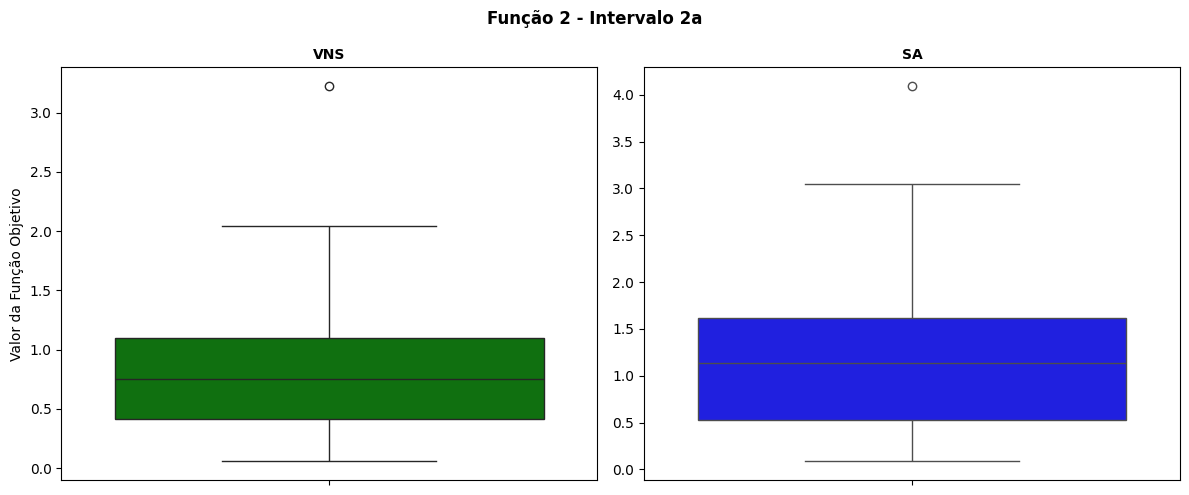

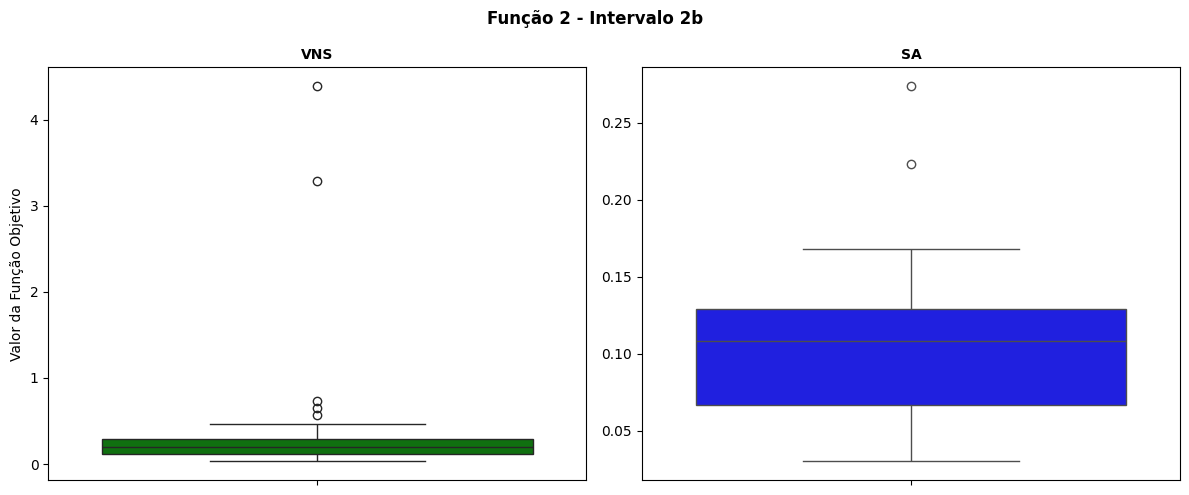

In [ ]:
print("Estatísticas Função 2 - Intervalo 2a")
estat_2a = estatisticas([vns_2a, sa_2a], 'f(x1,x2,x3,x4)', ['VNS', 'SA'])
print(estat_2a, "\n")

print("Estatísticas Função 2 - Intervalo 2b")
estat_2b = estatisticas([vns_2b, sa_2b], 'f(x1,x2,x3,x4)', ['VNS', 'SA'])
print(estat_2b, "\n")

exibirBoxplot(vns_2a['f(x1,x2,x3,x4)'], sa_2a['f(x1,x2,x3,x4)'], 'Função 2 - Intervalo 2a')
exibirBoxplot(vns_2b['f(x1,x2,x3,x4)'], sa_2b['f(x1,x2,x3,x4)'], 'Função 2 - Intervalo 2b')